<a href="https://www.kaggle.com/code/yorkyong/defective-steel-plate-ensemble?scriptVersionId=166477719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#FFCE30'> 1.1 |</span> Objective</b>
- In this notebook we will perform some simple EDA to check the dataset
- Thereafter we will use a pipeline to perform the necessary data preprocessing
- We will then use permutation importance / SHAP Value / and feature importance to select key features to use for the model (we keep up to 15)
- Send the model through Ensemble Learning and submit the results

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')

In [3]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [5]:
sample_submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>EDA</b></div>
- No missing data in both train and test set
- No catgorical data
- Last 7 columns of train data are target variable to predict

### <b><span style='color:#FFCE30'> 3.1 |</span> Train data</b>

In [6]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
id,19219.00,9609.00,5548.19,0.00,4804.50,9609.00,14413.50,19218.00
X_Minimum,19219.00,709.85,531.54,0.00,49.00,777.00,1152.00,1705.00
X_Maximum,19219.00,753.86,499.84,4.00,214.00,796.00,1165.00,1713.00
Y_Minimum,19219.00,1849756.04,1903553.85,6712.00,657468.00,1398169.00,2368032.00,12987661.00
Y_Maximum,19219.00,1846605.35,1896295.14,6724.00,657502.00,1398179.00,2362511.00,12987692.00
Pixels_Areas,19219.00,1683.99,3730.32,6.00,89.00,168.00,653.00,152655.00
X_Perimeter,19219.00,95.65,177.82,2.00,15.00,25.00,64.00,7553.00
Y_Perimeter,19219.00,64.12,101.05,1.00,14.00,23.00,61.00,903.00
Sum_of_Luminosity,19219.00,191846.68,442024.69,250.00,9848.00,18238.00,67978.00,11591414.00
Minimum_of_Luminosity,19219.00,84.81,28.80,0.00,70.00,90.00,105.00,196.00


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
cols = train.columns
cols

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

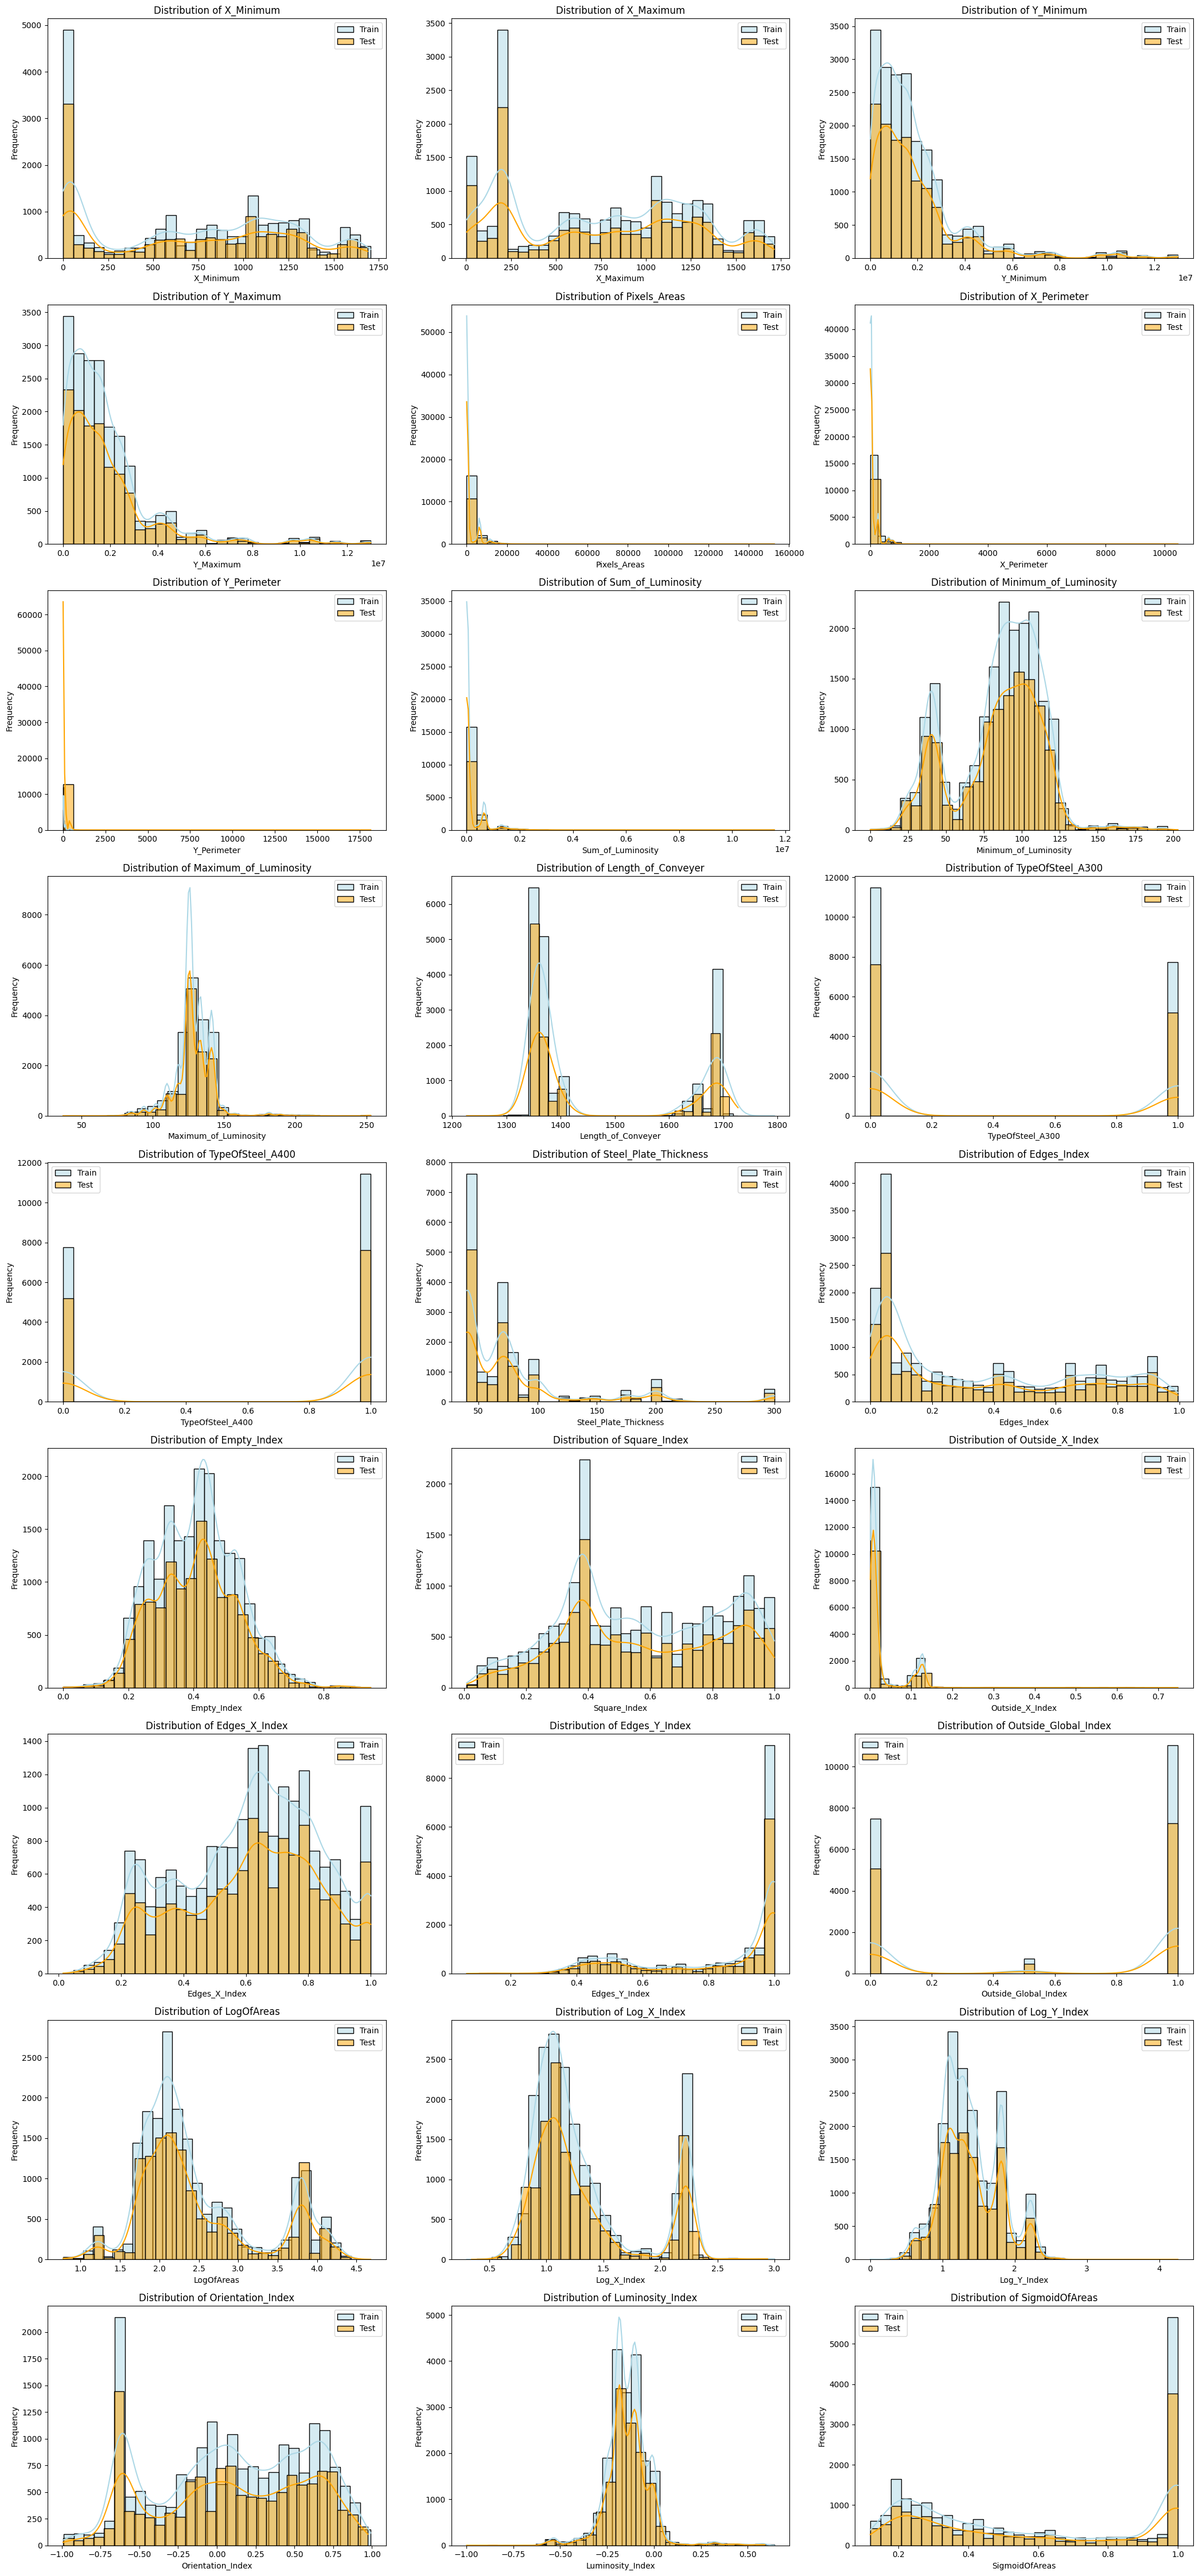

In [9]:
cols = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

colors = ['lightblue', 'orange']  

num_plots = len(cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.histplot(train[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(test[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

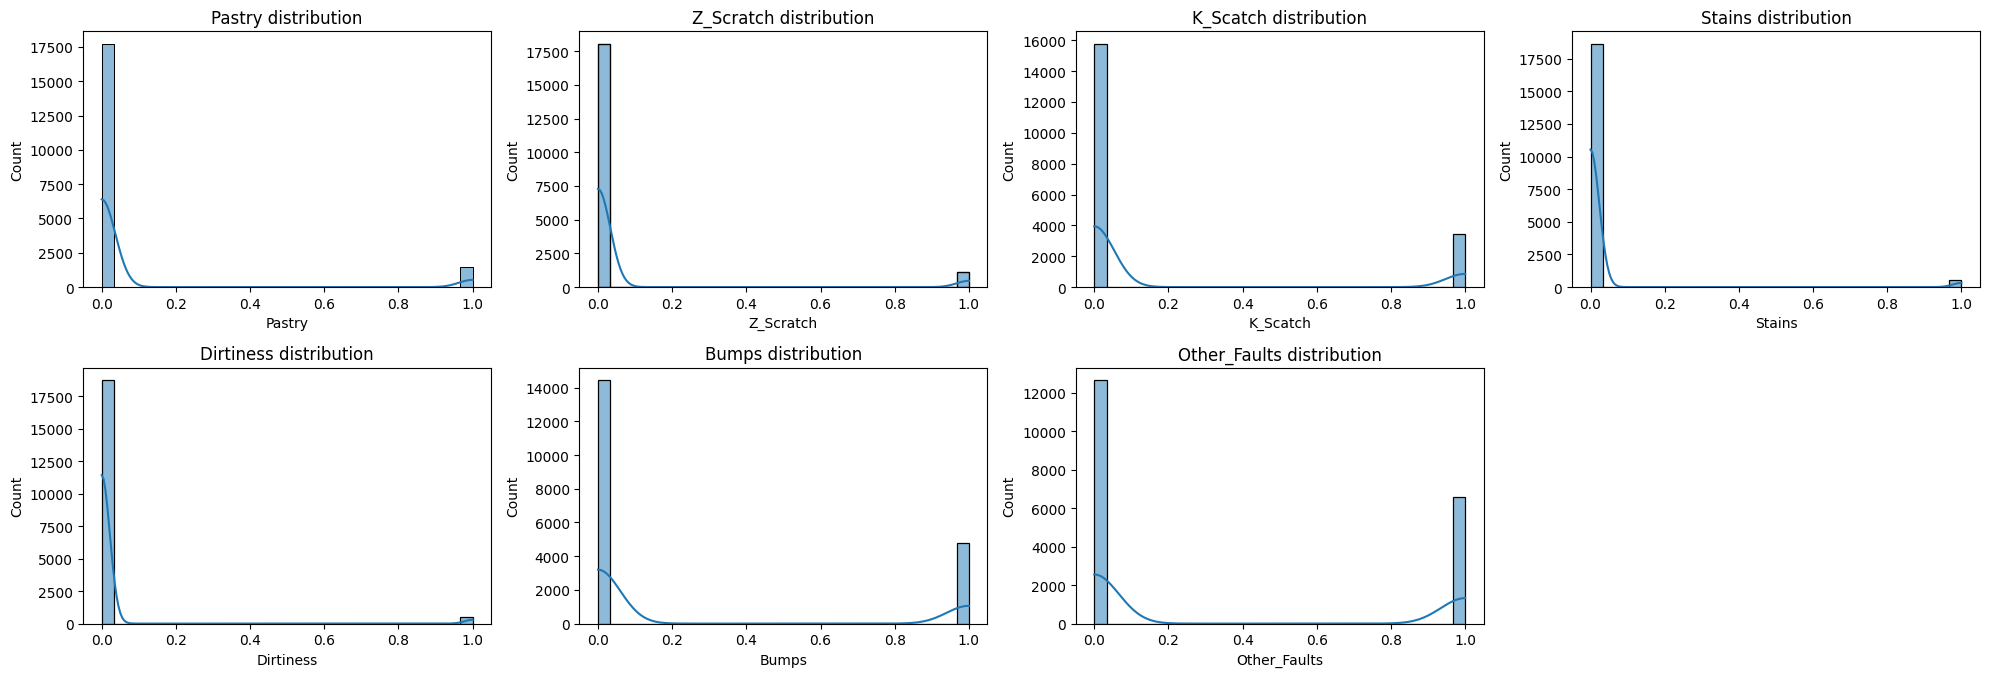

In [10]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']
plt.figure(figsize=(20,30))

for i, column in enumerate(target_cols):
    plt.subplot(9,4, i+1)
    sns.histplot(data=train, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

In [11]:
more_than_one_faults = train[train[target_cols].sum(axis=1) > 1][target_cols]
print(f'\nNumber of More than one faults: {more_than_one_faults.shape[0]}\n')
more_than_one_faults


Number of More than one faults: 21



,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
634,0,0,1,0,0,0,1
752,0,0,1,0,0,0,1
3572,0,0,1,0,0,1,0
4416,0,0,1,0,0,0,1
4530,0,0,1,0,0,0,1
4664,0,0,1,0,0,0,1
6448,0,0,1,0,0,0,1
7589,0,0,1,0,0,0,1
8075,0,0,1,0,0,0,1
8538,0,0,1,0,0,0,1


In [12]:
train = train[train[target_cols].sum(axis=1) <= 1]
train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


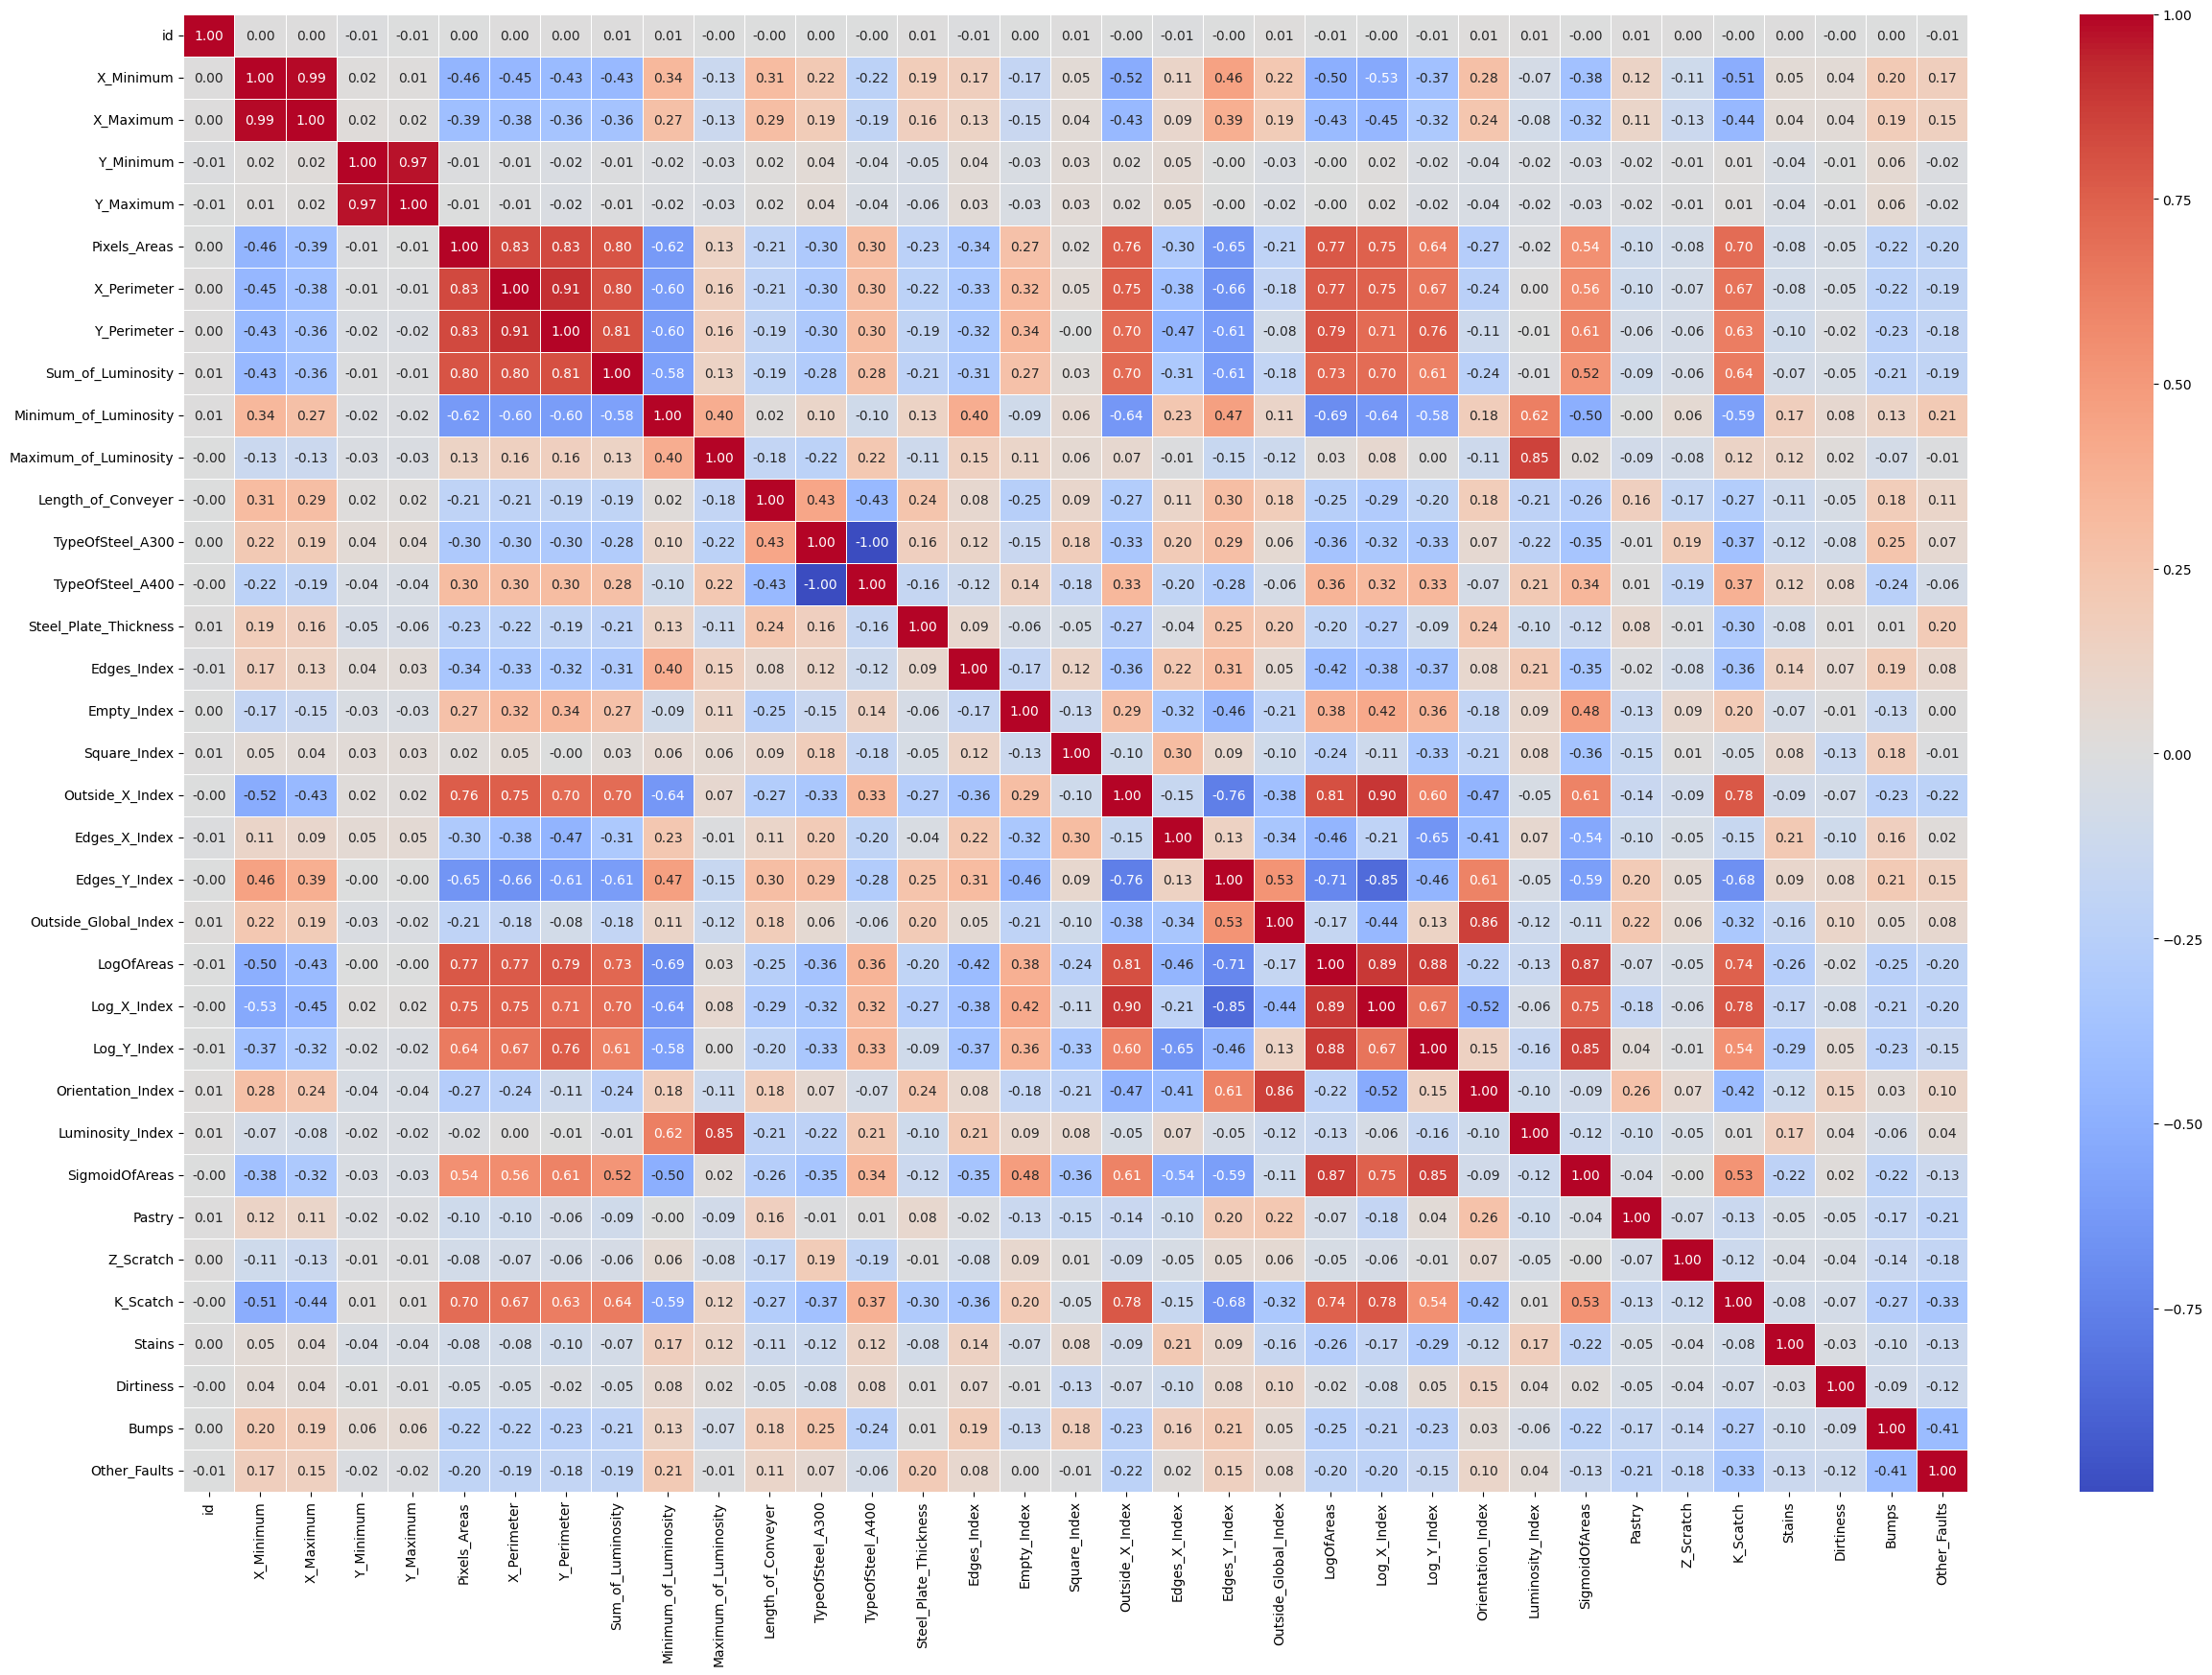

In [13]:
df_corr = train[train.columns].dropna().corr()
plt.figure(figsize=(30, 20))

# Plot the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

### <b><span style='color:#FFCE30'> 3.2 |</span> Test Data</b>

In [14]:
test.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
id,12814.00,25625.50,3699.23,19219.00,22422.25,25625.50,28828.75,32032.00
X_Minimum,12814.00,709.33,531.88,0.00,46.00,776.00,1152.00,1688.00
X_Maximum,12814.00,753.27,500.74,4.00,214.00,796.00,1167.00,1712.00
Y_Minimum,12814.00,1846533.46,1916427.39,6712.00,640173.75,1378890.50,2368032.00,12987661.00
Y_Maximum,12814.00,1842029.49,1911425.61,6724.00,639857.00,1378588.00,2356237.50,12987692.00
Pixels_Areas,12814.00,1672.91,3725.52,4.00,91.00,169.00,649.00,152655.00
X_Perimeter,12814.00,96.46,219.93,2.00,15.00,24.00,64.00,10449.00
Y_Perimeter,12814.00,64.73,188.51,2.00,14.00,24.00,60.00,18152.00
Sum_of_Luminosity,12814.00,192689.30,481287.15,535.00,9968.00,18402.00,66960.25,11591414.00
Minimum_of_Luminosity,12814.00,84.55,28.71,0.00,68.00,90.00,105.00,203.00


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>DATA PREPROCESSING</b></div>

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

### <b><span style='color:#FFCE30'> 4.1 |</span> Drop Columns</b>

In [17]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        return X.drop(self.cols, axis=1)

DropColumn(cols=['id']).fit_transform(train)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


### <b><span style='color:#FFCE30'> 4.2 |</span> Add Features</b>
- With reference from Ravi's notebook check it out here https://www.kaggle.com/code/ravi20076/playgrounds4e03-eda-binaryclassifier

In [18]:
class AddAdditionalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed["XRange"] = X["X_Maximum"] - X["X_Minimum"]
        X_transformed["YRange"] = X["Y_Maximum"] - X["Y_Minimum"]
        X_transformed['Area_Perimeter_Ratio'] = X['Pixels_Areas'] / (X['X_Perimeter'] + X['Y_Perimeter'])
        X_transformed['Luminosity_Range'] = X['Maximum_of_Luminosity'] - X['Minimum_of_Luminosity']
        X_transformed["Average_Luminosity"]=(X['Maximum_of_Luminosity'] + X['Minimum_of_Luminosity']) / 2
        
        return X_transformed
    
AddAdditionalFeatures().fit_transform(train)    

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,XRange,YRange,Area_Perimeter_Ratio,Luminosity_Range,Average_Luminosity
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,27,126.5
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,41,90.5
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,112,85.0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,20,124.0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,29,96.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,8,9,2.125000,18,131.0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,12,12,5.372093,29,118.5
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,25,74,3.679245,53,67.5
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,9,12,3.230769,44,110.0


### <b><span style='color:#FFCE30'> 4.2 |</span> Add Aspect Ratio</b>
- With reference from Ravi's notebook check it out here https://www.kaggle.com/code/ravi20076/playgrounds4e03-eda-binaryclassifier

In [19]:
class AddAspectRatio(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Aspect_Ratio'] = np.where(X['YRange'] == 0, 0, X['XRange'] / X['YRange'])
        return X_transformed

df1 = AddAdditionalFeatures().fit_transform(train)
AddAspectRatio().fit_transform(df1)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,XRange,YRange,Area_Perimeter_Ratio,Luminosity_Range,Average_Luminosity,Aspect_Ratio
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,27,126.5,1.200000
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,41,90.5,0.363636
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,112,85.0,2.250000
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,20,124.0,0.296296
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,29,96.5,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,8,9,2.125000,18,131.0,0.888889
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,12,12,5.372093,29,118.5,1.000000
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,25,74,3.679245,53,67.5,0.337838
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,9,12,3.230769,44,110.0,0.750000


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>ASSEMBLING THE PIPELINE</b></div>

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

In [21]:
named_preprocessing_pipeline = Pipeline([
        ('Addfeature', AddAdditionalFeatures()),
        ('AspectRatio', AddAspectRatio()),
    
        
        ('drop', DropColumn(cols=[
            'id', #id is not a useful feature
        ]
                           )
        ),
    
        ('prep', ColumnTransformer([
            ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
             list(['TypeOfSteel_A300',"TypeOfSteel_A400"])),],
         remainder='passthrough').set_output(transform='pandas')
        ),
])

named_preprocessing_pipeline

Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                ('AspectRatio', AddAspectRatio()),
                ('drop', DropColumn(cols=['id'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TypeOfSteel_A300',
                                                   'TypeOfSteel_A400'])]))])

In [22]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)


class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [23]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                ('AspectRatio', AddAspectRatio()),
                ('drop', DropColumn(cols=['id'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TypeOfSteel_A300',
                                                   'TypeOfSteel_A400'])])),
                ('scale', RobustScaler())])

In [24]:
label_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [25]:
# drop observations with multiple labels
train = train[train[label_cols].sum(axis=1) <= 1]

In [26]:
# add a label column for the multi-class classification 
sparse_labels = train[label_cols].values.copy()
sparse_labels = np.concatenate([sparse_labels, 1 - sparse_labels.sum(1)[:, np.newaxis]], axis=1)
train['label'] = np.argmax(sparse_labels, axis=1)

In [27]:
X = train.drop(columns=label_cols + ['label'])
y = train['label'].values

In [28]:
#checking output on train df
df_train = modelling_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, 0 to 19218
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   encode__TypeOfSteel_A300          19198 non-null  float64
 1   encode__TypeOfSteel_A400          19198 non-null  float64
 2   remainder__X_Minimum              19198 non-null  float64
 3   remainder__X_Maximum              19198 non-null  float64
 4   remainder__Y_Minimum              19198 non-null  float64
 5   remainder__Y_Maximum              19198 non-null  float64
 6   remainder__Pixels_Areas           19198 non-null  float64
 7   remainder__X_Perimeter            19198 non-null  float64
 8   remainder__Y_Perimeter            19198 non-null  float64
 9   remainder__Sum_of_Luminosity      19198 non-null  float64
 10  remainder__Minimum_of_Luminosity  19198 non-null  float64
 11  remainder__Maximum_of_Luminosity  19198 non-null  float64
 12  remainder

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>HPO + ENSEMBLE</b></div>

In [29]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier


# Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, log_loss

# Hyperparameter tuning
import optuna

# Warnings ignore
import warnings
warnings.filterwarnings("ignore")

### <b><span style='color:#FFCE30'> 6.1 |</span> Hyperparameter Tuning XGB</b>


In [30]:
TUNE = False

In [31]:
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the XGBClassifier
    param = {
        "objective": 'multi:softmax',
        "booster": 'gbtree',
        "random_state": 42,
        "num_class": 7,
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'gamma' : trial.suggest_float('gamma', 1e-9, 1.0),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.25, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 24),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
    }
    
    # Create an instance of LGBMClassifier with the suggested parameters
    xgb_classifier = XGBClassifier(**param)
    
    xgb_pipeline = make_pipeline(modelling_pipeline, xgb_classifier)
       
    # Fit the classifier on the training data
    xgb_pipeline.fit(X_train, y_train)

    # Calculate ROC-AUC score
    y_pred_prob = xgb_pipeline.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # ovr for multi-class classification
    xgb_log_loss = log_loss(y_test, y_pred_prob)
    print(f'roc-auc: {roc_auc}')
    print(f'Log Loss: {xgb_log_loss}')

    return roc_auc

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Adjust the test_size as needed

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)

if TUNE:

    # Run the optimization proces10
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

    # Get the best parameters after optimization
    best_params = study.best_params

[I 2024-03-11 13:49:30,353] A new study created in memory with name: no-name-2cd1d7f7-5810-4b4b-b247-afb57ecc72c4


### <b><span style='color:#FFCE30'> 6.2 |</span> Hyperparameter Tuning LGBM</b>

In [32]:
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
        "num_class": 7,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.025),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 6, 14),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
    }

    # Create an instance of LGBMClassifier with the suggested parameters
    lgbm_classifier = LGBMClassifier(**param)
    
    # Fit the classifier on the training data
    lgbm_classifier.fit(X_train, y_train)

       
    # Calculate ROC-AUC score
    y_pred_prob = lgbm_classifier.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # ovr for multi-class classification
    lgbm_log_loss = log_loss(y_test, y_pred_prob)
    print(f'roc-auc: {roc_auc}')
    print(f'Log Loss: {lgbm_log_loss}')
    
    return roc_auc

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Adjust the test_size as needed

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)

# If TUNE
if TUNE:
    # Run the optimization process
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

    # Get the best parameters after optimization
    best_params = study.best_params

[I 2024-03-11 13:49:30,625] A new study created in memory with name: no-name-fbaba7d7-0a0a-41a6-800f-84c5bdb1849e


### <b><span style='color:#FFCE30'> 6.3 |</span> Hyperparameter Tuning CatBoost</b>

In [33]:
from catboost import CatBoostClassifier
import optuna
from sklearn.model_selection import train_test_split

def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the CatBoostClassifier
    param = {
        "verbose": False,
        "iterations": 1000,
        "objective": "MultiClass",
        "eval_metric": "MultiClass",
        "boosting_type": "Plain",  # Using Plain boosting type
        "grow_policy": "SymmetricTree",  # Using SymmetricTree grow policy
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.03),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.5, 1.0),
    }

    # Create an instance of CatBoostClassifier with the suggested parameters
    catboost_classifier = CatBoostClassifier(**param)
    
    # Fit the classifier on the training data
    catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

    # Calculate ROC-AUC score
    y_pred_prob = catboost_classifier.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # ovr for multi-class classification
    cb_log_loss = log_loss(y_test, y_pred_prob)
    print(f'roc-auc: {roc_auc}')
    print(f'Log Loss: {cb_log_loss}')

    return roc_auc

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Adjust the test_size as needed

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)

# If TUNE
if TUNE:
    # Run the optimization process
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

    # Get the best parameters after optimization
    best_params = study.best_params


[I 2024-03-11 13:49:30,891] A new study created in memory with name: no-name-34ec0496-f466-44ab-8032-3bc671eb1182


### <b><span style='color:#FFCE30'> 6.4 |</span> Hyperparameter Tuning Weights</b>

In [34]:
# Best is trial 45 with value: 0.8633398952544837.

xgb_params =  {'n_estimators': 777, 
               'learning_rate': 0.020588543868445983, 
               'gamma': 0.8196006518470225, 
               'subsample': 0.9650435266522617, 
               'colsample_bytree': 0.33836615621768906, 
               'max_depth': 3, 
               'min_child_weight': 22, 
               'reg_lambda': 1.2748933745932837e-05, 
               'reg_alpha': 0.0016147872865068566}


# XGBoost baseline model
xgb_model = XGBClassifier(**xgb_params)

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)


#Best is trial 51 with value: 0.8623352540282269.

lgbm_params =  {'learning_rate': 0.010973570840903014, 
 'n_estimators': 429, 
 'lambda_l1': 0.011739198287554625, 
 'lambda_l2': 0.05874856754445479, 
 'max_depth': 13, 
 'colsample_bytree': 0.328807471795692, 
 'subsample': 0.5722216522876741, 
 'min_child_samples': 17,
 'num_class': 8,
 'verbose': -1

}


# LightGBM baseline model
lgbm_model = LGBMClassifier(**lgbm_params)

# Create a pipeline with preprocessing and LightGBM model
lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)



#Best is trial 85 with value: 0.8612023835728706.

cb_params =  {'learning_rate': 0.024465204788697435, 'depth': 5, 'l2_leaf_reg': 1.316692209272192, 'bagging_temperature': 0.5684684472212721,
    'random_seed': 42,
    'verbose': False,
    'iterations':1000,
}

# CatBoost baseline model
catboost_model = CatBoostClassifier(**cb_params)

# Create a pipeline with preprocessing and CatBoost model
cb_pipeline = make_pipeline(modelling_pipeline, catboost_model)



In [35]:
WEIGHT_TUNE = False

In [36]:
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the weighted ensemble
    
    obj_estimators = [
        ('XGB', xgb_pipeline),
        ('LGBM', lgbm_pipeline),
        ('CAT', cb_pipeline)
    ]
    
    voting_classifier = VotingClassifier(
        estimators=obj_estimators,
        voting='soft',
        weights=[
            trial.suggest_float('LGBM_Weight', 0.00, 10.00),
            trial.suggest_float('XGB_Weight', 0.00, 10.00),
            trial.suggest_float('CAT_Weight', 0.00, 10.00),
        ],
    )
    
    voting_classifier.fit(X_train, y_train)
    
    predict_probs = voting_classifier.predict_proba(X_test)
    
    auc_score = roc_auc_score(y_test, predict_probs, multi_class='ovr')

    return auc_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Adjust the test_size as needed

# Set up the sampler for Optuna optimization
weight_sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
weight_study = optuna.create_study(direction="maximize", sampler=weight_sampler)

if WEIGHT_TUNE:

    # Run the optimization process
    weight_study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

    # Get the best parameters after optimization
    weight_best_params = weight_study.best_params
    
    print(f'BEST WEIGHTS: {weight_best_params}')

[I 2024-03-11 13:49:31,412] A new study created in memory with name: no-name-3868b104-fe4f-4a98-82d6-7b3e4c8ba968


### <b><span style='color:#FFCE30'> 6.2 |</span> Ensemble</b>

In [37]:
#BEST WEIGHTS: {'LGBM_Weight': 6.187277552255075, 'XGB_Weight': 3.6342324988447414, 'CAT_Weight': 1.8675940231075683} Best is trial 86 with value: 0.8635329341994878.

ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_pipeline),
    ('lgb', lgbm_pipeline),
    ('cb', cb_pipeline)
  
            
]
                                  , voting='soft',
                                  weights = [1,1,1]) 

ensemble_model

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('Addfeature',
                                                                AddAdditionalFeatures()),
                                                               ('AspectRatio',
                                                                AddAspectRatio()),
                                                               ('drop',
                                                                DropColumn(cols=['id'])),
                                                               ('prep',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('encode',
                                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                unknown_value=-1),
                                                                                                 ['TypeOfSteel_A300',
                                                                                                  'Ty...
                                                                DropColumn(cols=['id'])),
                                                               ('prep',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('encode',
                                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                unknown_value=-1),
                                                                                                 ['TypeOfSteel_A300',
                                                                                                  'TypeOfSteel_A400'])])),
                                                               ('scale',
                                                                RobustScaler())])),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x7afe6da05180>)]))],
                 voting='soft', weights=[1, 1, 1])

In [38]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# Number of folds
n_splits = 5

# Adjusting parameters of StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Fit the model
    ensemble_model.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred_prob = ensemble_model.predict_proba(X_val)
    y_pred = ensemble_model.predict(X_val)
        
    # Calculate evaluation metrics
    f1 = f1_score(y_val, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_val, y_val_pred_prob, multi_class='ovr')

    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-' * 70)

    # Results
    cv_results.append(roc_auc)

# Average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


Fold 1, AUC Score on Validation Set: 0.8624284071238288
Fold 1, F1 Score on Validation Set: 0.5630827638075904
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.8652267387460741
Fold 2, F1 Score on Validation Set: 0.5709112598419643
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.865386611608228
Fold 3, F1 Score on Validation Set: 0.5476652473978466
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.8610672519856252
Fold 4, F1 Score on Validation Set: 0.5615215875579016
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.8630345094649339
Fold 5, F1 Score on Validation Set: 0.559281221803652
----------------------------------------------------------------------

Average AUC-score across 5 folds: 0.863428703785738


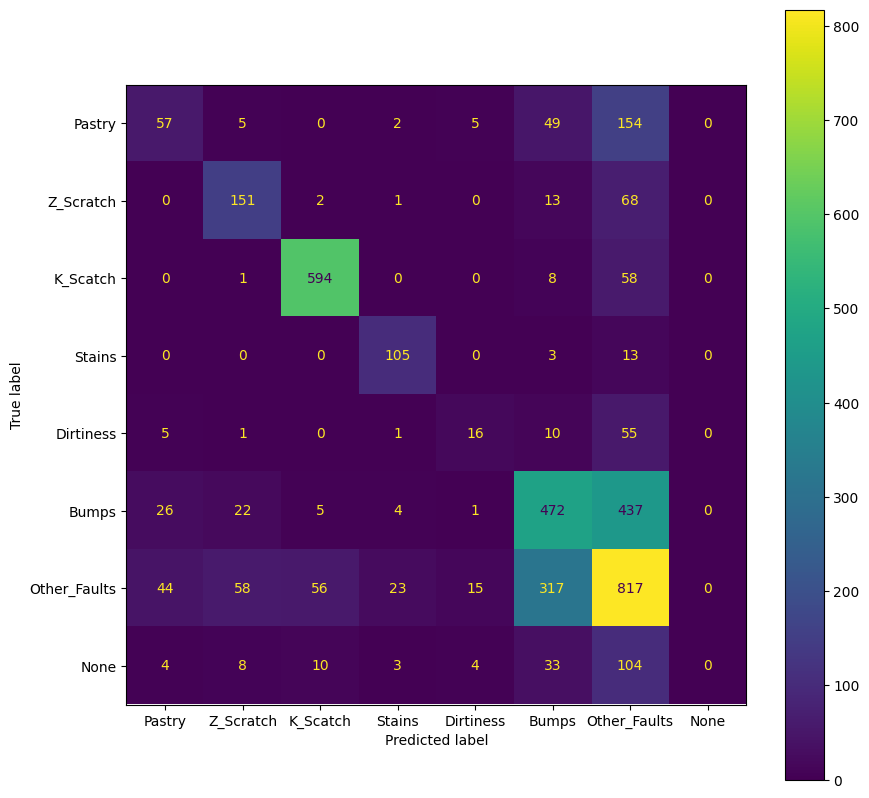

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ensemble_model.fit(X_train,y_train)

predictions = ensemble_model.predict(X_val)

cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults','None'])

plt.figure(figsize=(10, 10))

# Plot the confusion matrix
disp.plot(ax=plt.gca())  # Use the current axes
plt.show()

- Seems to have difficulty to seperate 'Other_Faults' and 'Bumps' properly

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>SUBMISSION</b></div>

In [40]:
# Fit the xgb model model
ensemble_model.fit(X, y)

# Create submission file with probability predictions
predictions = ensemble_model.predict_proba(test)[:, :-1]

sample_submission[label_cols] = predictions
sample_submission.to_csv('submission_baseline_ensemble.csv', index=False)

In [41]:
sample_submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.503537,0.002472,0.004372,0.000196,0.017412,0.139070,0.300721
1,19220,0.310941,0.024277,0.009156,0.000437,0.145819,0.162331,0.316572
2,19221,0.003902,0.042250,0.048970,0.000847,0.009285,0.299662,0.521984
3,19222,0.159747,0.003792,0.001773,0.002124,0.014880,0.374902,0.412553
4,19223,0.003037,0.004007,0.002291,0.002168,0.005060,0.615912,0.333033
...,...,...,...,...,...,...,...,...
12809,32028,0.073752,0.103582,0.006547,0.000337,0.027798,0.232231,0.452943
12810,32029,0.174389,0.006457,0.023097,0.015040,0.135481,0.187109,0.412371
12811,32030,0.000479,0.000504,0.933270,0.000098,0.000396,0.001292,0.049875
12812,32031,0.404059,0.008801,0.018887,0.000300,0.056217,0.145559,0.322894


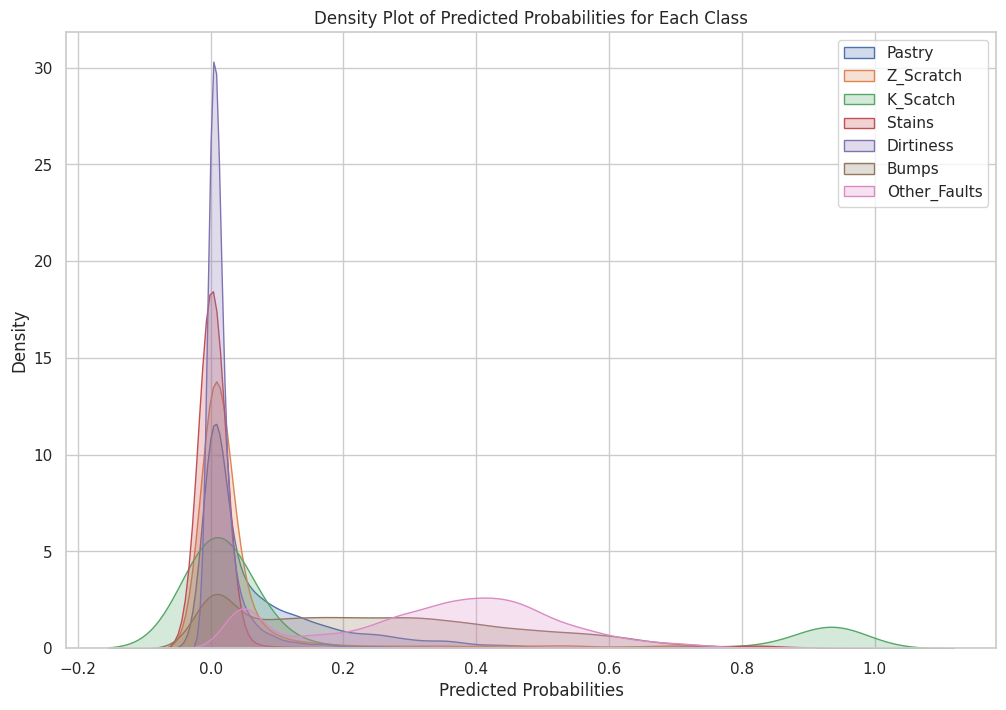

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Specify the columns you want to plot (excluding the 'id' column)
columns_to_plot = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Plot density plot for each category
plt.figure(figsize=(12, 8))
for column in columns_to_plot:
    sns.kdeplot(data=sample_submission[column], label=column, fill=True)
    
plt.title('Density Plot of Predicted Probabilities for Each Class')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()